In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
import numpy as np

In [2]:
device = ("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using {device} device")

Using cuda device


In [3]:
training_x = torch.tensor([
    [32.],
    [37.],
    [25.]
])

training_y = torch.tensor([
    [34.],
    [36.],
    [24.]
])

In [4]:
testing_x = torch.tensor([
    [27.],
])

testing_y = torch.tensor([
    [28.]
])

In [5]:
dataset = TensorDataset(training_x, training_y)
train_loader = DataLoader(dataset, batch_size=1, shuffle=True)

In [6]:
class LSTMModeler(nn.Module):
    def __init__(self, input_size, hidden_layer_size, output_size):
        super(LSTMModeler, self).__init__()

        self.lstm = nn.LSTM(input_size, hidden_layer_size)
        self.linear = nn.Linear(hidden_layer_size, output_size)
        self.hidden_cell = (torch.zeros(1, 1, hidden_layer_size),
                            torch.zeros(1, 1, hidden_layer_size))

    def forward(self, x):
        lstm_out, self.hidden_cell = self.lstm(x.view(len(x), 1, -1), self.hidden_cell)
        out = self.linear(lstm_out.view(len(x), -1))
        return out[-1]

In [7]:
losses = []
hidden_layer_size = 10
input_size = 1
output_size = 1
model = LSTMModeler(input_size, hidden_layer_size, output_size).to(device)
loss_function = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

print(model)

d:\anaconda3\envs\pytorch-training\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


LSTMModeler(
  (lstm): LSTM(1, 10)
  (linear): Linear(in_features=10, out_features=1, bias=True)
)


In [8]:
epochs = 100

for epoch in range(epochs):
    total_loss = 0
    
    for (x, y) in train_loader:
        x, y = torch.tensor(x).to(device), torch.tensor(y).to(device)

        model.zero_grad()

        model.hidden_cell = (torch.zeros(1, 1, hidden_layer_size).to(device),
                             torch.zeros(1, 1, hidden_layer_size).to(device))

        y_hat = model(x)

        loss = loss_function(y, y_hat)

        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        
    losses.append(total_loss)

C:\Users\HashTable\AppData\Local\Temp\ipykernel_19980\2923910748.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x, y = torch.tensor(x).to(device), torch.tensor(y).to(device)
d:\anaconda3\envs\pytorch-training\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


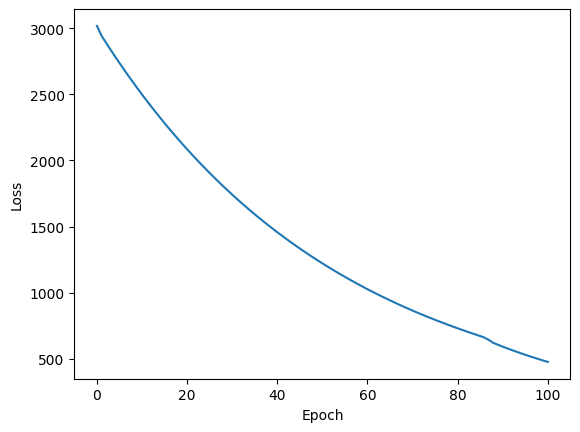

In [9]:
import matplotlib.pyplot as plt

def plot_losses(ax, t, losses):
    ax.plot(t, losses)
    ax.set_xlabel("Epoch")
    ax.set_ylabel("Loss")

fig, ax = plt.subplots()
plot_losses(ax, np.linspace(0., len(losses), len(losses)), losses)

In [10]:
for x, y in zip(testing_x, testing_y):
    # Get predicted vector
    with torch.no_grad():
        model.hidden_cell = (torch.zeros(1, 1, hidden_layer_size).to(device),
                             torch.zeros(1, 1, hidden_layer_size).to(device))

        x = x.view(-1, 1, 1).to(device)  # (sequence_length, batch_size, input_size)
        
        pred = model(x)

    print(f"y_true: {int(y.item())}, y_hat: {int(pred.item())}")

y_true: 28, y_hat: 19
